In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Loading data from: aggregated_iteration_grading_results_with_year.csv

--- Scaling Data (AIME 2024) ---
  experiment_type  iteration_0_correct  iteration_1_correct  \
0    backtracking             0.733333             0.725000   
1        base_sum             0.733333             0.791667   
2          firstk             0.733333             0.650000   
3           lastk             0.733333             0.750000   
4       postThink             0.733333             0.766667   

   iteration_2_correct  iteration_3_correct  iteration_4_correct  
0             0.775000             0.783333             0.816667  
1             0.750000             0.766667             0.775000  
2             0.691667             0.625000             0.658333  
3             0.766667             0.766667             0.783333  
4             0.783333             0.791667             0.791667  


/var/folders/hb/lpmy59_93pbcgdhxqxkfs02m0000gn/T/ipykernel_64208/3193308.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', num_experiments if num_experiments > 0 else 1)


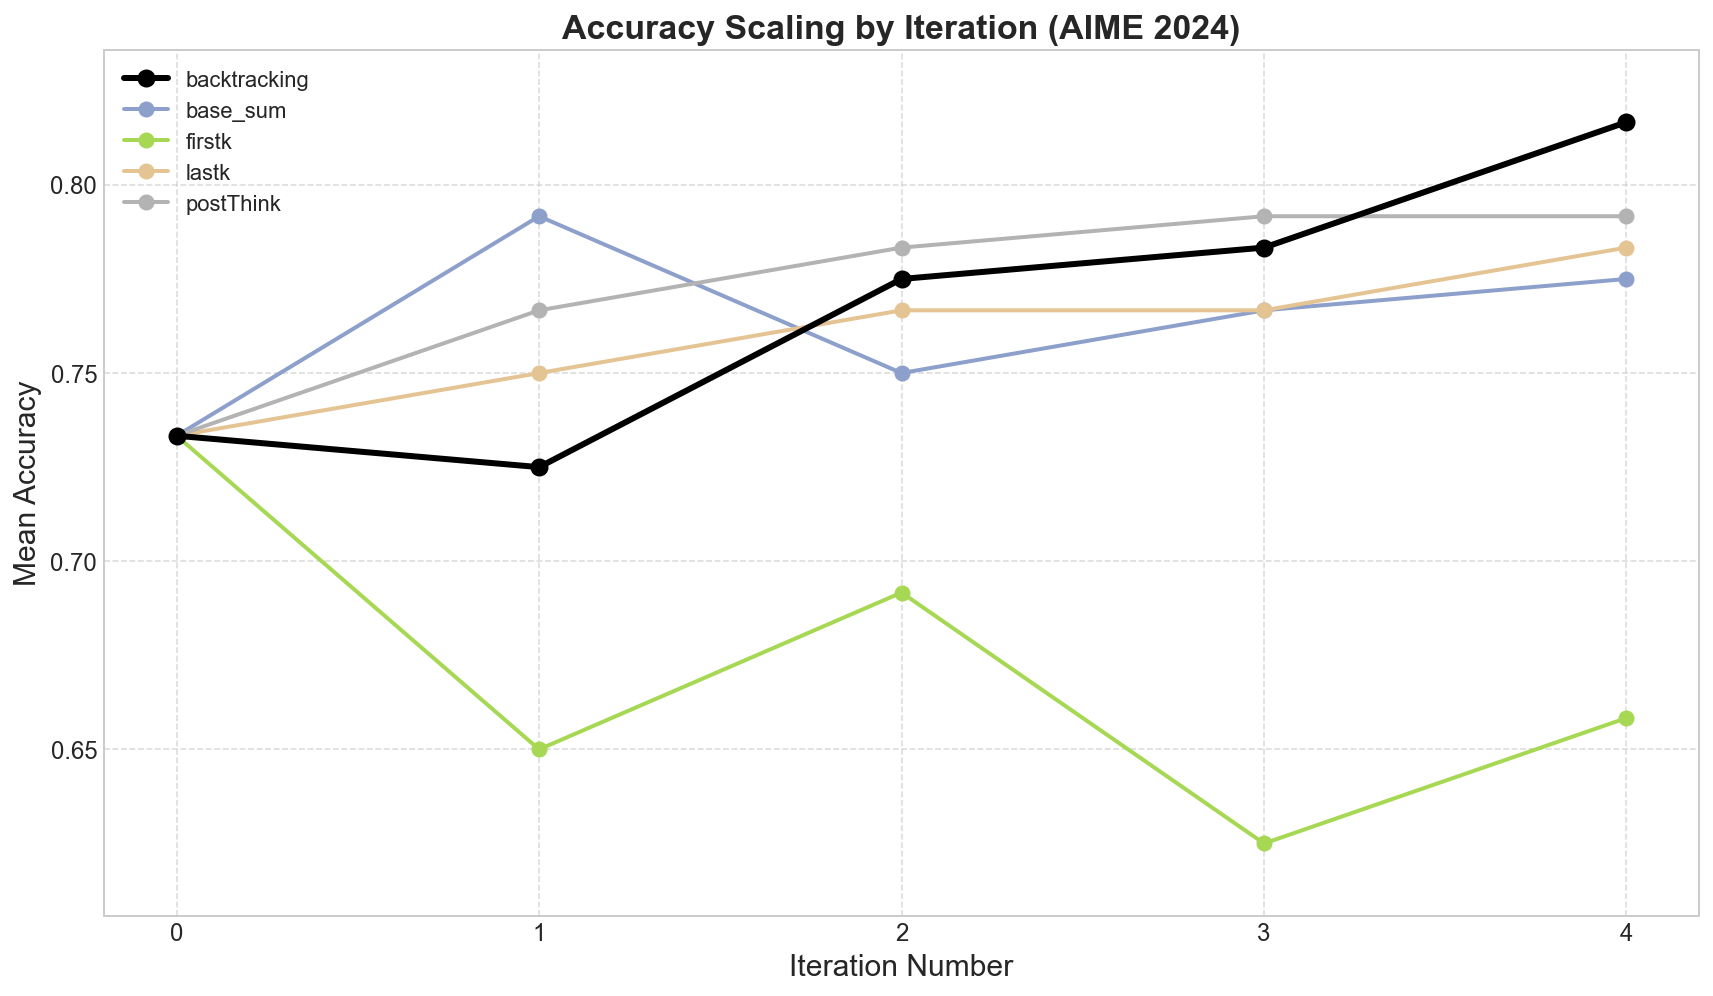


--- Scaling Data (AIME 2025) ---
  experiment_type  iteration_0_correct  iteration_1_correct  \
0    backtracking                0.525             0.600000   
1        base_sum                0.525             0.616667   
2          firstk                0.525             0.458333   
3           lastk                0.525             0.575000   
4       postThink                0.525             0.566667   

   iteration_2_correct  iteration_3_correct  iteration_4_correct  
0             0.608333             0.625000             0.666667  
1             0.566667             0.591667             0.641667  
2             0.458333             0.458333             0.450000  
3             0.566667             0.566667             0.608333  
4             0.616667             0.650000             0.658333  


/var/folders/hb/lpmy59_93pbcgdhxqxkfs02m0000gn/T/ipykernel_64208/3193308.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', num_experiments if num_experiments > 0 else 1)


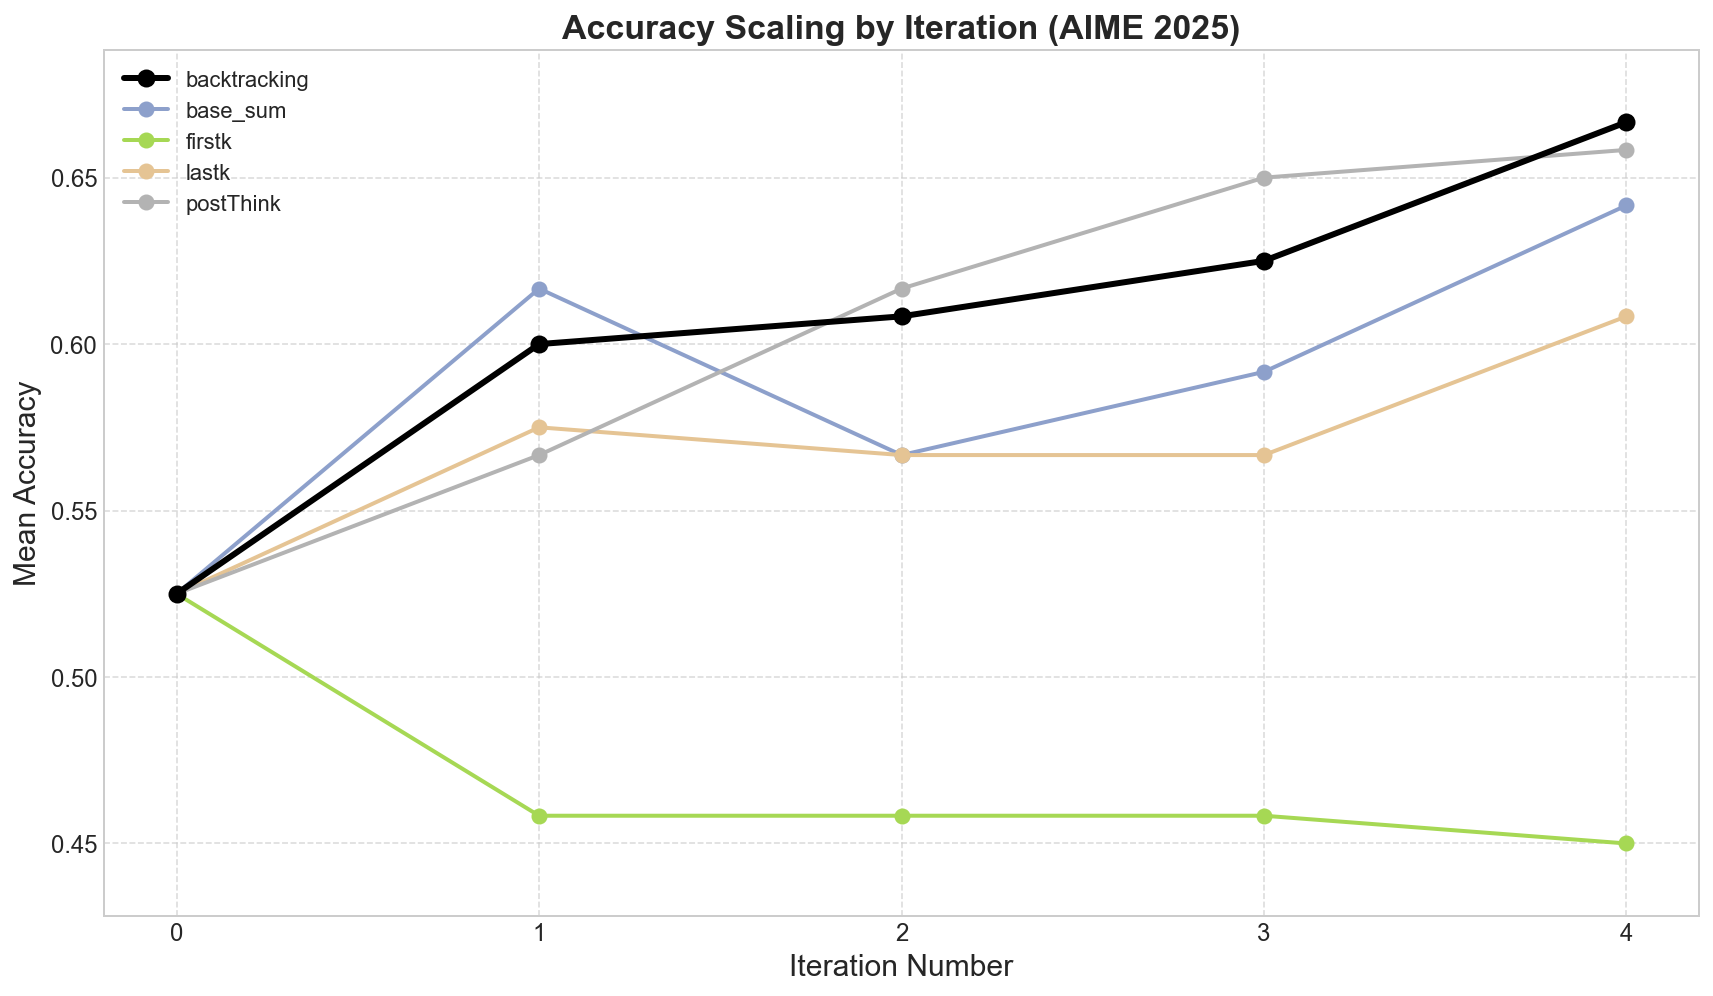

/var/folders/hb/lpmy59_93pbcgdhxqxkfs02m0000gn/T/ipykernel_64208/3193308.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', num_experiments if num_experiments > 0 else 1)



--- Scaling Data (AIME 2024 & 2025) ---
  experiment_type  iteration_0_correct  iteration_1_correct  \
0    backtracking             0.629167             0.662500   
1        base_sum             0.629167             0.704167   
2          firstk             0.629167             0.554167   
3           lastk             0.629167             0.662500   
4       postThink             0.629167             0.666667   

   iteration_2_correct  iteration_3_correct  iteration_4_correct  
0             0.691667             0.704167             0.741667  
1             0.658333             0.679167             0.708333  
2             0.575000             0.541667             0.554167  
3             0.666667             0.666667             0.695833  
4             0.700000             0.720833             0.725000  


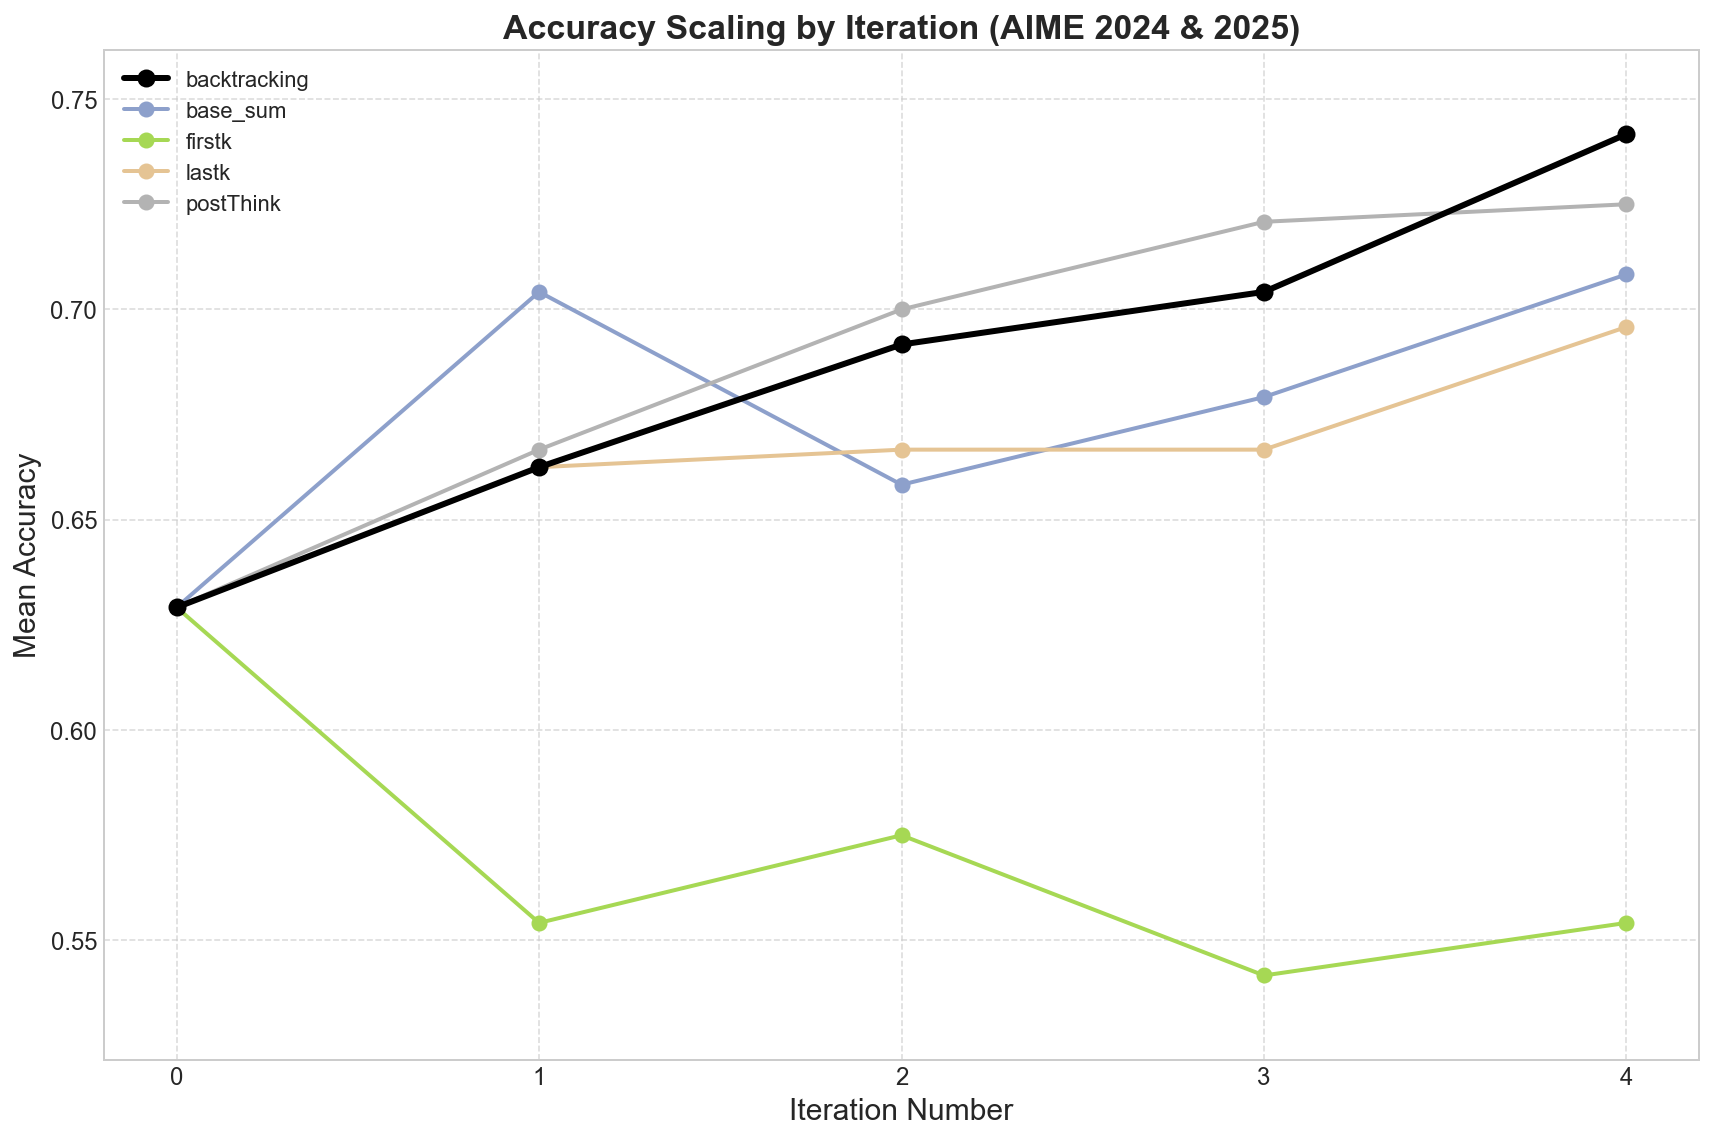

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Function to create scaling line plots ---
def plot_scaling_accuracy_by_iteration(results_df, plot_title_suffix="", ax=None):
    """
    Plots the average accuracy for each experiment_type across iterations 0-4.
    The average is taken over all problems and seeds within the given results_df.
    Dynamically adjusts y-axis to zoom in on the data range.

    Args:
        results_df (pd.DataFrame): DataFrame containing the grading results.
                                   Must include 'experiment_type' and 
                                   'iteration_X_correct' columns.
        plot_title_suffix (str): Suffix for the plot title.
        ax (matplotlib.axes.Axes, optional): Axes to plot on. If None, a new one is created.
    """
    if results_df.empty:
        print(f"Input DataFrame is empty for suffix '{plot_title_suffix}'. Cannot generate scaling plot.")
        return

    iteration_cols = [f'iteration_{i}_correct' for i in range(5)]
    required_cols = ['experiment_type'] + iteration_cols
    missing_cols = [col for col in required_cols if col not in results_df.columns]

    if missing_cols:
        print(f"Missing required columns: {missing_cols} for suffix '{plot_title_suffix}'. Cannot generate scaling plot.")
        return

    # Ensure iteration columns are numeric
    # Create a copy to avoid SettingWithCopyWarning if results_df is a slice
    df_to_process = results_df.copy()
    for col in iteration_cols:
        df_to_process[col] = pd.to_numeric(df_to_process[col], errors='coerce')
    
    scaling_data = df_to_process.groupby('experiment_type')[iteration_cols].mean().reset_index()

    if scaling_data.empty:
        print(f"No scaling data could be generated for suffix '{plot_title_suffix}'.")
        return

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 7))
    else:
        fig = ax.get_figure()

    num_experiments = len(scaling_data['experiment_type'].unique())
    if num_experiments <= 10:
        colors = plt.cm.get_cmap('Set2', num_experiments if num_experiments > 0 else 1)

    elif num_experiments <=20:
        colors = plt.cm.get_cmap('tab20', num_experiments)
    else: 
        colors = plt.cm.get_cmap('viridis', num_experiments)

    iteration_numbers = list(range(5))
    
    all_plot_accuracies = [] # To find overall min/max for ylim

    for i, row in scaling_data.iterrows():
        exp_type = row['experiment_type']
        accuracies = row[iteration_cols].values 
        all_plot_accuracies.extend(accuracies) # Collect all y-values
        
        current_color = colors(i % num_experiments)
        current_linewidth = 2
        current_markersize = 7
        current_zorder = 2 # Default zorder

        if exp_type == 'backtracking':
            current_color = 'black'  # Or a specific dark color like '#333333'
            current_linewidth = 3  # Make it slightly thicker
            current_markersize = 8
            current_zorder = 3     # Ensure it's drawn on top of other lines if overlapping

        ax.plot(iteration_numbers, accuracies, marker='o', linestyle='-', 
                linewidth=current_linewidth, 
                label=exp_type, color=current_color, 
                markersize=current_markersize,
                zorder=current_zorder)

    ax.set_xlabel("Iteration Number", fontsize=15)
    ax.set_ylabel("Mean Accuracy", fontsize=15)
    ax.set_title(f"Accuracy Scaling by Iteration {plot_title_suffix}".strip(), fontsize=17, fontweight='bold')
    ax.set_xticks(iteration_numbers)
    ax.set_xticklabels([str(it) for it in iteration_numbers], fontsize=12)
    
    # --- Dynamic Y-axis scaling ---
    if all_plot_accuracies: # Check if any data was actually plotted
        min_val = np.nanmin(all_plot_accuracies) # Use nanmin to ignore NaNs if any
        max_val = np.nanmax(all_plot_accuracies)
        
        padding = (max_val - min_val) * 0.10 # 10% padding
        if padding == 0: # Handle case where all values are the same
            padding = 0.1 
            
        ax.set_ylim(max(0, min_val - padding), min(1, max_val + padding)) # Ensure ylim stays within [0,1] typically
    else:
        ax.set_ylim(-0.05, 1.05) # Default if no data

    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if num_experiments > 5:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.15, 
                         box.width, box.height * 0.85])
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
                  fancybox=True, shadow=True, ncol=min(3, num_experiments), fontsize=10)
    else:
        ax.legend(fontsize=11, loc='best')

    # ax.set_facecolor('#f9f9f9')
    # The following lines related to fig.patch.set_facecolor and tight_layout 
    # should ideally be called where fig is definitively created or before plt.show()
    # if ax is passed. For simplicity, assuming they are handled by the caller if ax is passed.
    if fig and ax is None: # Only if we created fig in this function scope
        fig.patch.set_facecolor('white')
        plt.tight_layout(rect=[0, 0.05, 1, 0.95] if num_experiments > 5 else None)
        plt.show() 
    elif fig: # If ax was passed, the caller might handle show()
        fig.patch.set_facecolor('white') # Still set facecolor
        # Caller should handle plt.tight_layout() and plt.show()
        
    print(f"\n--- Scaling Data {plot_title_suffix} ---")
    print(scaling_data)


# --- Main script execution starts here ---
# (The rest of your main script from summ_scaling_plots.ipynb, lines 84-153, would follow)
# Make sure to use this updated plot_scaling_accuracy_by_iteration function.
RESULTS_DF_PATH = "aggregated_iteration_grading_results_with_year.csv"

if os.path.exists(RESULTS_DF_PATH):
    print(f"Loading data from: {RESULTS_DF_PATH}")
    results_df = pd.read_csv(RESULTS_DF_PATH)
else:
    print(f"Error: Results DataFrame file not found at {RESULTS_DF_PATH}.")
    results_df = pd.DataFrame() 

if not results_df.empty:
    if 'year' in results_df.columns:
        results_df['year'] = pd.to_numeric(results_df['year'], errors='coerce')
        results_df.dropna(subset=['year'], inplace=True)
        results_df['year'] = results_df['year'].astype(int)
    else:
        print("Warning: 'year' column not found in DataFrame. Cannot create year-specific plots.")

    plt.style.use('seaborn-v0_8-whitegrid') 

    if 'year' in results_df.columns:
        df_2024 = results_df[results_df['year'] == 2024]
        if not df_2024.empty:
            fig2024, ax2024 = plt.subplots(figsize=(12, 7)) # Create fig and ax
            plot_scaling_accuracy_by_iteration(df_2024, plot_title_suffix="(AIME 2024)", ax=ax2024)
            plt.tight_layout(rect=[0, 0.05, 1, 0.95] if len(df_2024['experiment_type'].unique()) > 5 else None)
            plt.show() # Show plot
        else:
            print("No data available for 2024 to plot scaling lines.")

    if 'year' in results_df.columns:
        df_2025 = results_df[results_df['year'] == 2025]
        if not df_2025.empty:
            fig2025, ax2025 = plt.subplots(figsize=(12, 7)) # Create fig and ax
            plot_scaling_accuracy_by_iteration(df_2025, plot_title_suffix="(AIME 2025)", ax=ax2025)
            plt.tight_layout(rect=[0, 0.05, 1, 0.95] if len(df_2025['experiment_type'].unique()) > 5 else None)
            plt.show() # Show plot
        else:
            print("No data available for 2025 to plot scaling lines.")

    if not results_df.empty: 
        fig_combined, ax_combined = plt.subplots(figsize=(12, 8)) # Create fig and ax
        plot_scaling_accuracy_by_iteration(results_df, plot_title_suffix="(AIME 2024 & 2025)", ax=ax_combined)
        plt.tight_layout(rect=[0, 0.05, 1, 0.95] if len(results_df['experiment_type'].unique()) > 5 else None)
        plt.show() # Show plot
    else:
        print("No data available for combined plot.")
else:
    print("Could not load data, so no plots will be generated.")
